# 필요한 라이브러리

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# EDA

## 데이터 형태 살펴보기

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**데이터는 총 12개의 컬럼이 존재하며 각각이 의미하는 마는 다음과 같다**

| 컬럼                                         | 설명                    | 자료형  |
| -------------------------------------------- | ----------------------- | ------- |
| Survived                                     | 0이면 사망, 1이면 생존  | int64   |
| Pclass                                       | 티켓 등급 : 1, 2, 3     | int64   |
| Name                                         | 승객 이름 :             | object  |
|                                              |                         |         |
| 성, 호칭. 이름                               |                         |         |
| Surname, Title. Firstname                    |                         |         |
| Sex                                          | 성별 : male, female     | object  |
| Age                                          | 승객의 나이             | float64 |
| SibSp                                        | 형제, 자매, 배우자의 합 | int64   |
| Parch                                        | 부모, 자식의 합         | int64   |
| Ticket                                       | 티켓 번호               | object  |
| Fare                                         | 요금                    | float64 |
| Cabin                                        | 객실 번호               | object  |
| Embarked                                     | 선착장 :                | object  |
|                                              |                         |         |
| C(Cherbourg), Q(Queenstown),  S(Southampton) |                         |         |



## PassengerId의 분석

In [12]:
train.describe().iloc[:,0]

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

PassengerId는 891개의 행이 존재 == 배에 타고 있었던 승객이 891명이었다는 의미로 해석

In [18]:
# PassengerId의 결측치가 존재하는지 확인한다.
train.iloc[:,0].isnull().sum()

0

PassengerId는 이 이상으로 확인할 필요는 없어 보인다.

## Survived의 분석

In [19]:
train.describe().iloc[:,1]

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

0이면 사망 1이면 생존인 데이터 셋에서 target의 역할을 하는 컬럼이다.

데이터의 불균형이 있는지 우선 확인해 보자

<AxesSubplot:>

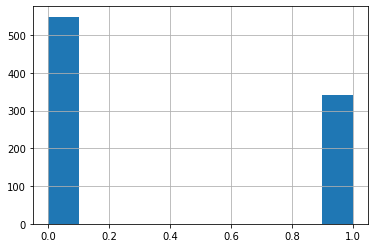

In [21]:
train.iloc[:,1].hist()

생존한 사람과 사망한 사람의 비율이 5:5이면 분석이 편했겠지만 불균형이 있으니 나중에 전처리 과정에서 데이터를 불려주자

https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html  (관련 블로그)

## Pclass의 분석

In [37]:
train[["Pclass","PassengerId"]].groupby(['Pclass']).count()


,PassengerId
Pclass,
1,216
2,184
3,491


티켓의 등급은 1등급 > 2등급 > 3등급 순서이다

분석하기전 예측하건데 3등급 티켓을 구매한 이들이 더 많이 사망했을 것 같다.(그냥 느낌상으로)

## Name의 분석

딱히 집중할 필요는 없는 것 같다

null 값이 있는지만 확인해 보자

In [57]:
train.iloc[:,3].isnull().sum()

0

결측치는 없었다

나중에 이름 각각의 문자열의 길이와 티켓등급과의 상관 관계를 확인해 보는것도 나쁘지 않을 것 같다

## sex의 분석

In [59]:
# 성별의 형태가 문자열로 되어있다. 
# 학습시에는 0,1로 매핑을 따로 해줄 계획이다.
train[["Sex","PassengerId"]].groupby(['Sex']).count()

,PassengerId
Sex,
female,314
male,577


남자는 577명

여자는 314명이다.

어디에서 듣기로 여성과 아이를 배려했다고 하는데 여성의 생존률이 더 높을것 같다.

## Age의 분석

In [72]:
# 결측치 확인
train.iloc[:,5].isnull().sum()

177

나이에는 결측치가 상당히 있다(177개)


891개의 데이터중 177개의 데이터가 결측값이라면 상당히 큰 비중이다.

만약 성능을 엄청 향상시켜야 한다면 이 부분이 관건일 것 같다.


<AxesSubplot:>

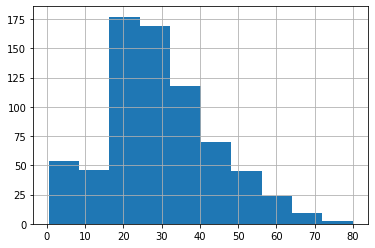

In [74]:
# 나이의 분포
train.iloc[:,5].hist()

Sex
female    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
male      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

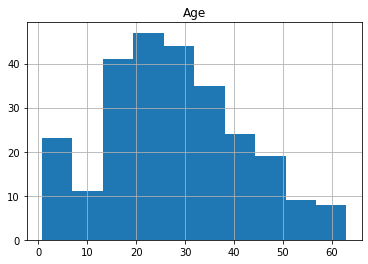

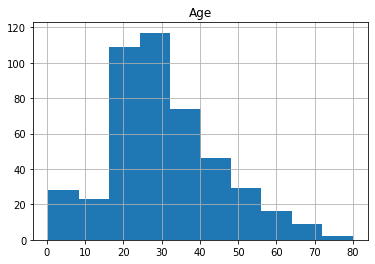

In [84]:
# 남성과 여성의 차이에 따른 나이의 분포
train[["Sex","Age"]].groupby('Sex').hist()

위의 그래프가 여성의 나이 히스토그램

아래 그래프가 남성의 나이 히스토그램이다.

Pclass
1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
2    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
3    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

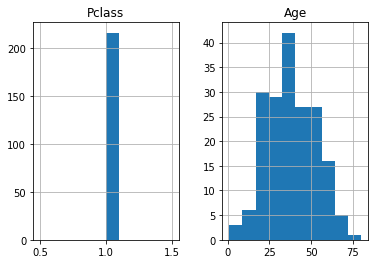

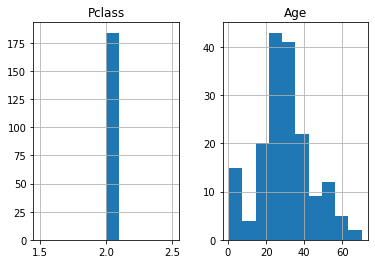

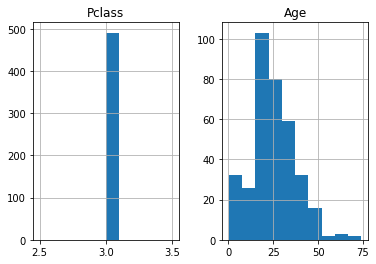

In [88]:
# Pclass 에 따른 나이의 분포
train[["Pclass","Age"]].groupby('Pclass').hist()

Pclass의 등급이 높을수록 나이가 많은 사람이 많을 것이다 라고 예상하였는데 3등급의 티켓이 아니라면 분포에 크게 차이는 없었다.

## SibSp의 분석

<AxesSubplot:>

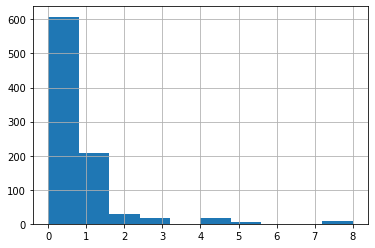

In [90]:
train["SibSp"].hist()

많은 사람들이 형제 자매 배우자의 합이 0 아니면 1 이다.

이는 혼자 탑승한 인원들이 많다고 생각된다

티켓등급별로 이 컬럼의 분포를 살펴보자

Pclass
1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
2    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
3    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

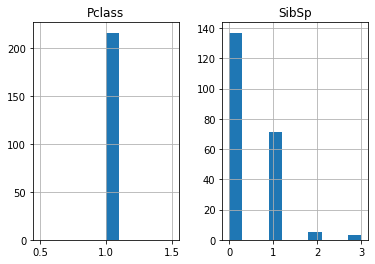

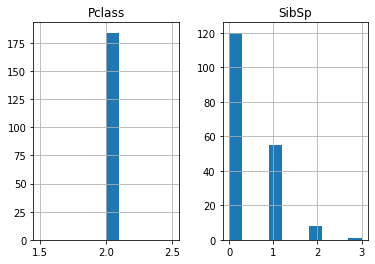

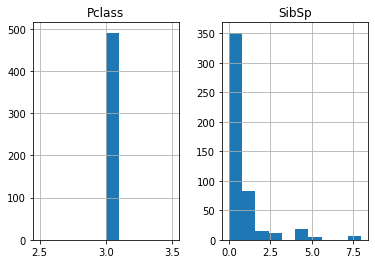

In [91]:
train[["Pclass","SibSp"]].groupby('Pclass').hist()

2등급과 1등급의 경우 3등급 티켓보다 1의 비율이 높은걸로 보아 부부끼리 탑승한 경우가 많았다고 추측한다.

그리고 3들급 티켓의 경우 신기하게도 4이상의 값들이 확인이 되는데 이들은 도대체 초호화 여객선인 타이나닉 호에 어째서 탑승을 하였을까?...

## 

# 라이브러리(필요한 도구) 불러오기